# Mateusz Nowakowski, Praca Domowa 2, 3b

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

To show, that $X$ is indeed a discrete distribution it has must satisfy sum condition:

$\sum_{x \in \mathbb{R}} P(X = x) = 1$

Here we have

$$\sum_{x \in \mathbb{R}} P(X = x) = \sum_{x \in \mathbb{Z}}P(X = x) = P(X = 0) + \sum_{x \in \mathbb{Z} - \{0\}}P(X = x)\\ =  \frac{1}{2} + 2 \sum_{k = 1}^\infty \frac{1}{4} \cdot \frac{1}{k(k + 1)} = \frac{1}{2} + 2 \sum_{k = 1}^\infty \frac{1}{4} \cdot \frac{1}{k(k + 1)} \\ 
= \frac{1}{2} + \frac{1}{2} \sum_{k = 1}^\infty \frac{1}{k} - \frac{1}{k + 1} = \frac{1}{2} + \frac{1}{2}(\lim_{n \to \infty} 1 - \frac{1}{n}) = \frac{1}{2} + \frac{1}{2} = 1$$

So the condition is satisfied.

For the mean value to exist series that defines $EX$ must converge absolutely.

For $X$ we get

$EX = \sum_{x \in \mathbb{R}} xP(X = x) = \frac{1}{4}\sum_{k \in \mathbb{Z} - \{0\}} \frac{k}{|k|(|k| + 1)}$

For absolute convergence sum

$$\sum_{k \in \mathbb{Z} - \{0\}} \left|\frac{k}{|k|(|k| + 1)}\right|$$

would have to converge

But its easy to see that it doesn't:
$$\sum_{k \in \mathbb{Z} - \{0\}} \left|\frac{k}{|k|(|k| + 1)}\right| = \sum_{k \in \mathbb{Z} - \{0\}} \frac{1}{(|k| + 1)} = 2 \sum_{k = 2}^\infty \frac{1}{k} $$

We know series $\sum_{n = 1}^\infty \frac{1}{n}$ diverges.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

* Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$:

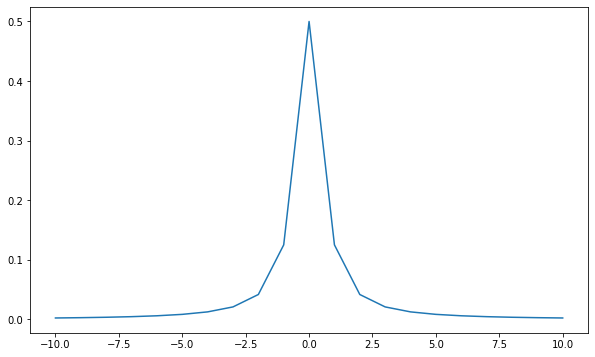

In [2]:
def f(k):
    if k == 0:
        return 1 / 2
    return 1 / (4 * abs(k) * (abs(k) + 1))

arguments = np.arange(-10, 11)
values = np.array([f(x) for x in arguments])

plt.figure(figsize=(10, 6))
plt.plot(arguments, values)
plt.show()

* Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized):

In [3]:
def sample():
    is_zero = random.randint(0, 1)
    if (is_zero == 1):
        return 0
    sign = -1 if random.randint(0, 1) == 1 else 1
    x = 0
    while(x == 0):
        x = random.random() # it's VERY unlikely for this loop to run more than one time
    k = np.ceil(1 / x) - 1
    return k * sign

### Quick explonation of function above
In the distribution $P(X = 0) = \frac{1}{2}$.
As $X = 0$ is a inconvienient case we check if $X = 0$ by choosing a number from $\{0, 1\}$.
Next, if $X \neq 0$ there is an equal chance of drawing a positive and a negative number.
Again, by choosing a number from $\{0, 1\}$ we sample sign of a number that will be returned.

Now, if we know that $X \neq 0$ and know $sign(X)$ we sample $X$ with assumption $X > 0$ (if by random choice $X < 0$ we just multiply sampled number by $-1$).

From reasoning above it should obvious that $P(X > 0) = \frac{1}{4}$

For $k = 1, \ldots, \infty$ we have:
$$ P(X = k | X > 0) = \frac{P(X = k \cap X > 0)}{P(X > 0)} = 4P(X = k) $$

We begin sampling $X$ with assumption $X > 0$ by choosing uniformly $x$ from $(0, 1)$

$$x \in (0, 1)$$

Now, if we find such $k$, that $\frac{1}{k + 1}\leq x < \frac{1}{k}$ we say, that $X = k$. That reasoning
is correct, because in uniform sampling for each $k$ propability of $x \in [\frac{1}{k + 1}, \frac{1}{k})$ is equal to 

$$\frac{1}{k} - \frac{1}{k + 1} = \frac{1}{k(k + 1)} = 4P(X = k) = P(X = k | X > 0)$$

Now we only have to know a way of finding $k$ in constant time. It's not difficult:

$$\frac{1}{k + 1}\leq x < \frac{1}{k} \implies k < \frac{1}{x} \leq k + 1$$
$$k < \frac{1}{x} \leq k + 1 \Leftrightarrow \left\lceil\frac{1}{x}\right\rceil = k + 1$$

So 
$$k = \left\lceil\frac{1}{x}\right\rceil - 1$$

 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
 $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges?

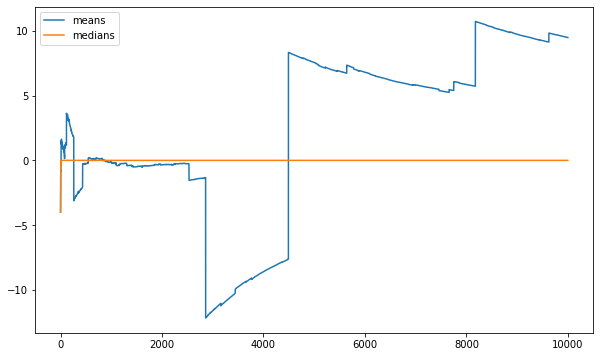

In [11]:
N = 10000

values = np.array([sample() for idx in range(N)])

means = np.cumsum(values).astype(np.float32) / np.arange(1, N + 1)  # compute cumulative means

plt.figure(figsize=(10, 6))
plt.plot(means, label = "means")

median_arr = np.array([np.median(values[0: i + 1]) for i in range(0, N)])
plt.plot(median_arr, label = "medians")

plt.legend()
plt.show()

Mean value doesn't seem to converge, whereas median converges to 0

 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

Median seems to be working better, as it converges to 0